# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black  # for jupyter notebooks
!pip install black[jupyter] --quiet # for v=google colab

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00


In [2]:
# Library to help with statistical analysis
import scipy.stats as stats

# import the scipy package and check the version to be sure that the version is above 1.6.1 so that some updated functions do not throw error.
import scipy
scipy.__version__

'1.11.4'



```
# This is formatted as code
```

## Loading the dataset

In [3]:
# import drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

# read the data from file
data = pd.read_csv('/content/drive/MyDrive/DSBA - UTA/Course Work/Project 3/used_device_data.csv')

Mounted at /content/drive


## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [4]:
# Returns the first 5 rows of the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


**Observation:** The dataset contains information about different phone/tablet and their features/attributes.

### Checking the shape of the dataset

In [ ]:
# View the shape of the dataset and count the number of rows and columns of the dataset
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 3454 rows and 15 columns


**Observation:** There are 3454 rows and 15 columns.

### Checking the data types of the columns for the dataset

In [ ]:
# Checking the datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observation:** All of the above datatypes are as expected.

### Checking for duplicate values

In [ ]:
# Checking the for any duplicate records
data.duplicated().sum()

0

**Observation:** The dataset doesn't contain any duplicate values.

### Statistical summary of the dataset

In [ ]:
# Obtaining statistical summary of numerical and categorical data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


**Observations:**

1. Below is the statistical summary for the categorical variables:

  1. **brand_name** We have 34 unique phone/tablet brands in the dataset.
  2. **os** We have 4 unique os values with majority phone/tablet being on **Android** os.
  3. **4g** majority of the phone/tablet have 4g connectivity.
  4. **5g** very limited amount of the phone/tablet have 5g connectivity.

2. Below is the statistical summary for the numberical variables:

  1. The mean screen size is around 13.71 cm while the meadian is 12.83 cm.
  2. Majority phone/tablet have a low resolution main camera. The median resolution is around 8MP whereas few phone/tablet go as high as 48MP
  3. Similarly, majority of phone/tablet have low selfie camera resolution. The median resolution is around 5MP where as few phone/tablet go as high as 32MP.
  4. Seeing another trend where internal memory & RAM size of majority phone/tablet is low. The median is around 32GB & 4GB respectively where as few phone/tablet go as high as 1TB & 12GB respectively.
  5. See similar trends with battery size and weight of the phone/tablet. The median battery size 3000 mAh and median weight being 160 grams where as some phone/tablet go as high as 9720 mAh in battery size and 855 grams in weight.
  6. This differences can be found due to the evolution of the phone/tablet in last few years. The median year of phone/tablet we have is 2015 where as we have few phone/tablet as new as 2020.
  7. Average usage of these phone/tablet is close to ~2 years.

### Checking for missing values

In [ ]:
# Checking for missing values in the data using isnull() function
data.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Observation:** There are missing values in many columns.

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**Creating below functions to define a user created combined histogram, boxplot and a labelled bar chart to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

**`Main Camera(MP)`**

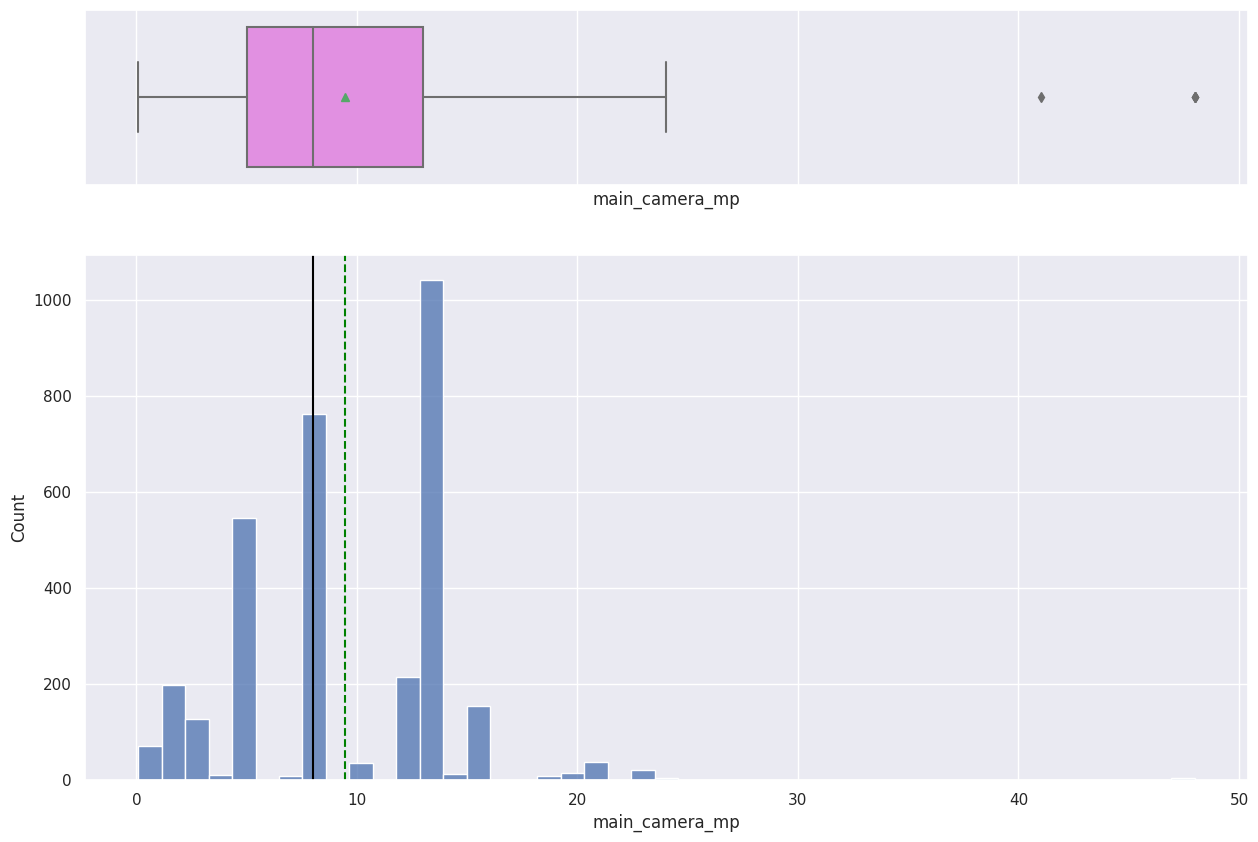

In [ ]:
histogram_boxplot(df, "main_camera_mp")

* The main camera megapixel are right-skewed. Phone/tablet have either 5MP, 8MP or 13MP resolution for the main camera with a median resolution of less than 10MP.

**`Selfie Camera(MP)`**

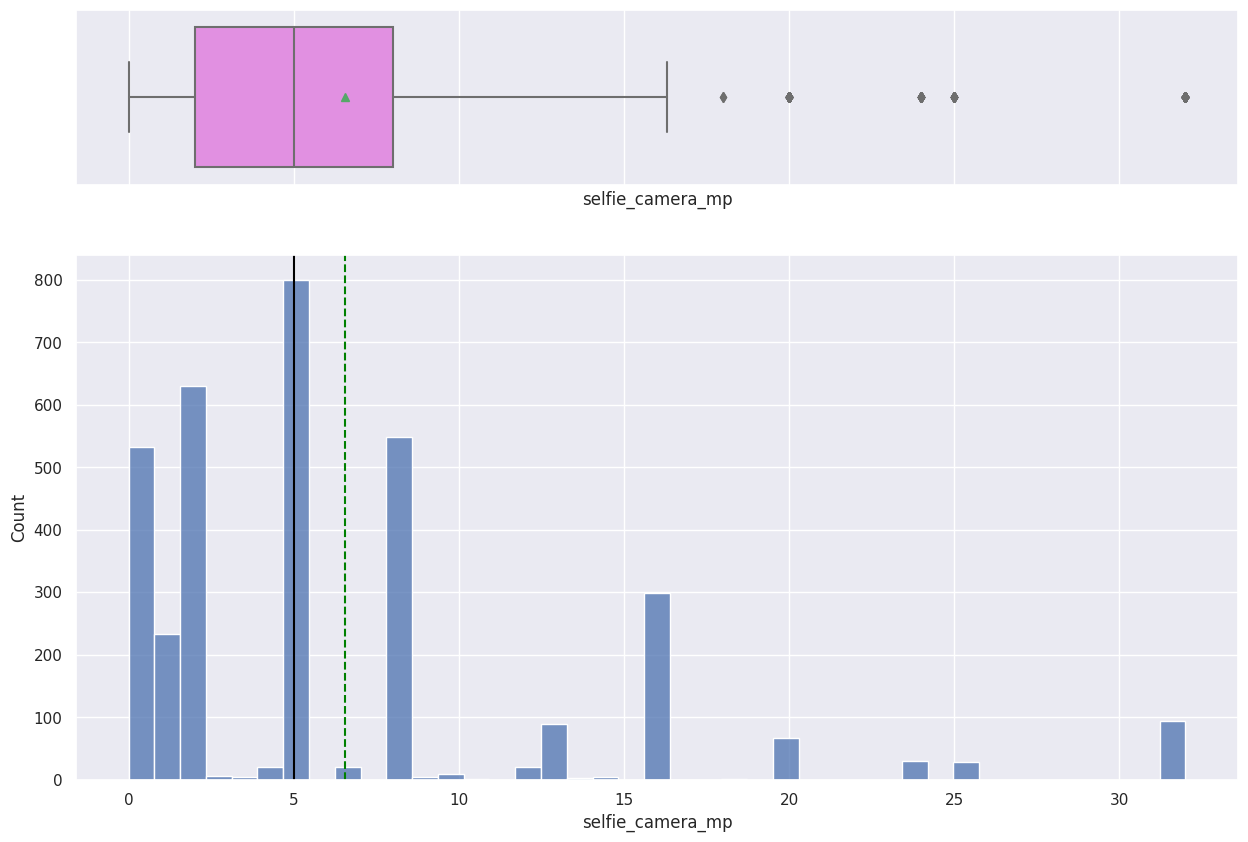

In [ ]:
histogram_boxplot(df, "selfie_camera_mp")

* The selfie camera megapixel are right-skewed. Phone/tablet have a very small resolution for their selfie camera with a median resolution of less than 5MP.

**`Internal Memory`**

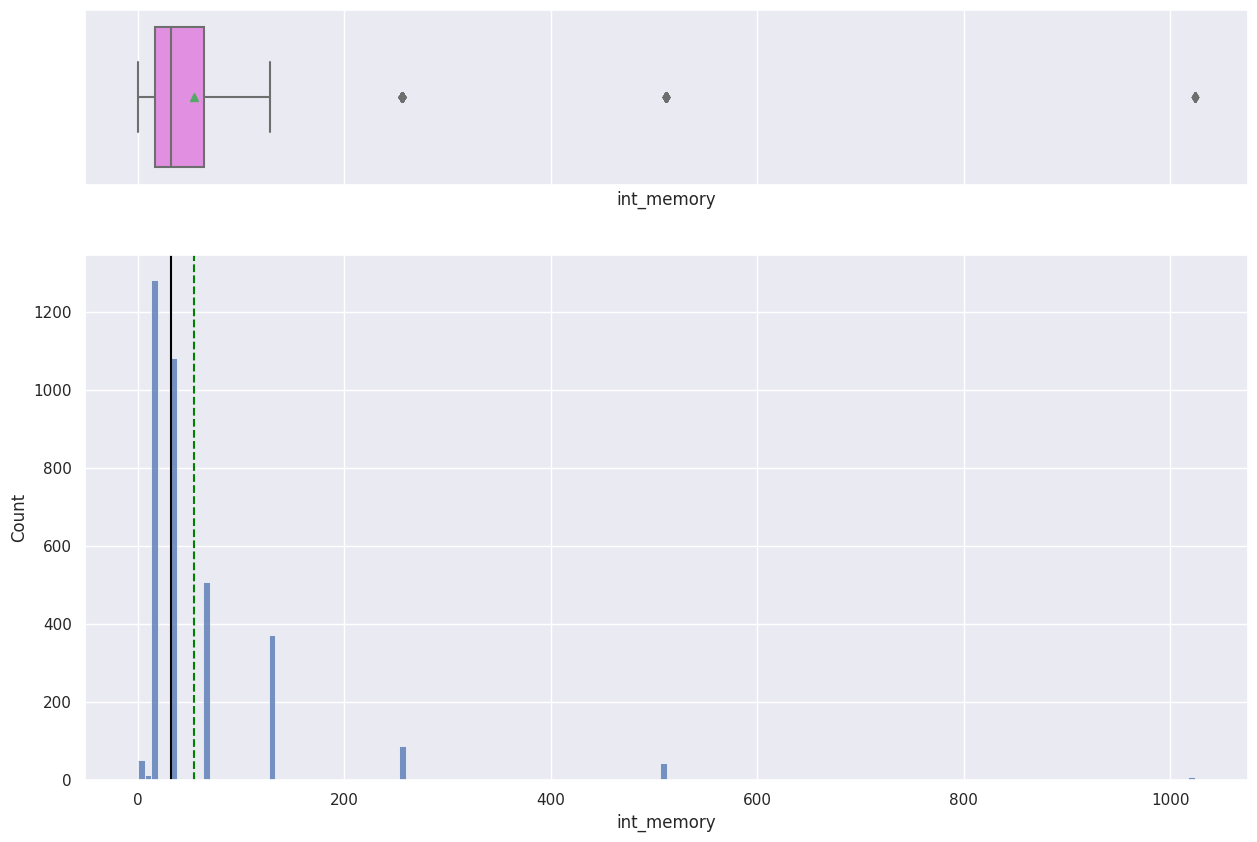

In [ ]:
histogram_boxplot(df, "int_memory")

* The internal storage memory attribute is right-skewed. Majority of the phone/tablet have a very small storage memory with a median storage size of less than 50GB.

**`RAM`**

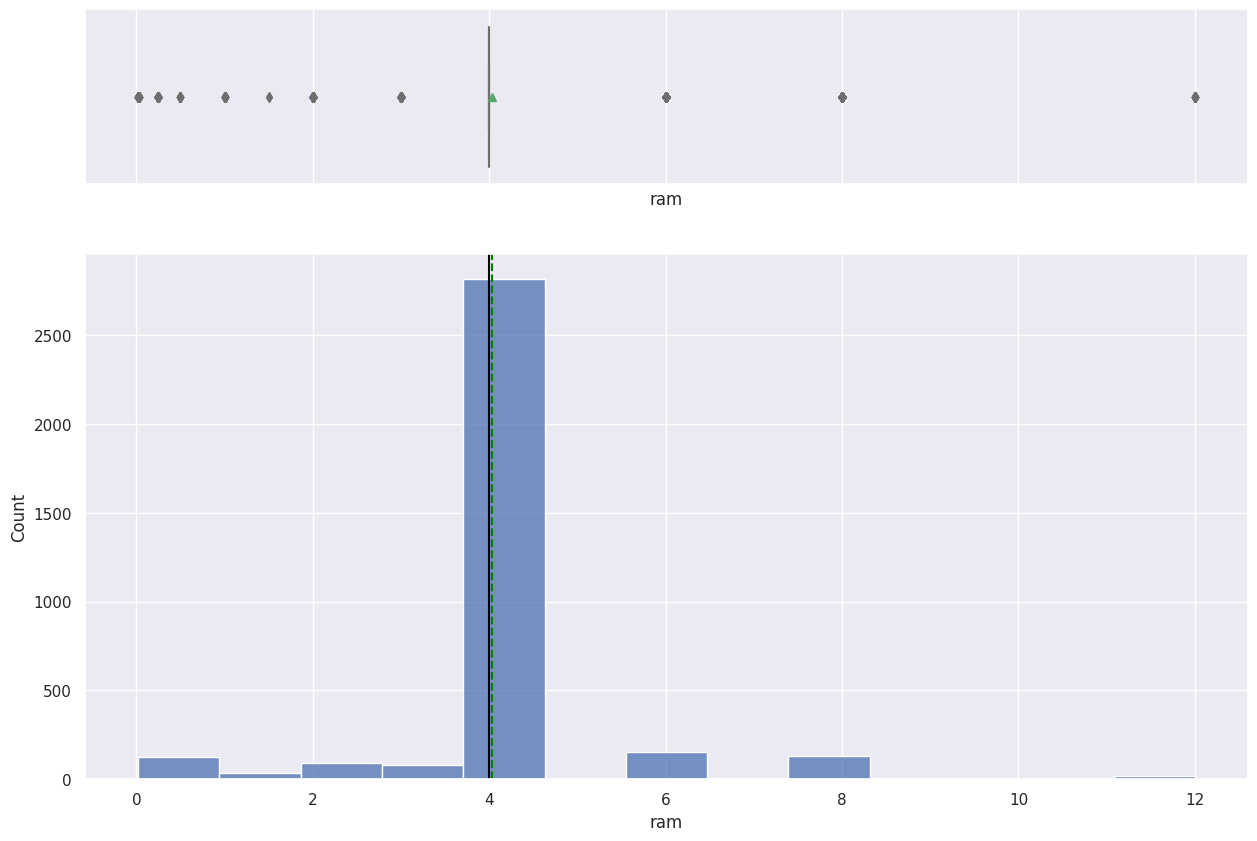

In [ ]:
histogram_boxplot(df, "ram")

* The RAM memory attribute looks normally distribute as mean, median and mode are equal. Almost all cellphones except few have 4GB of RAM size.

**`Battery`**

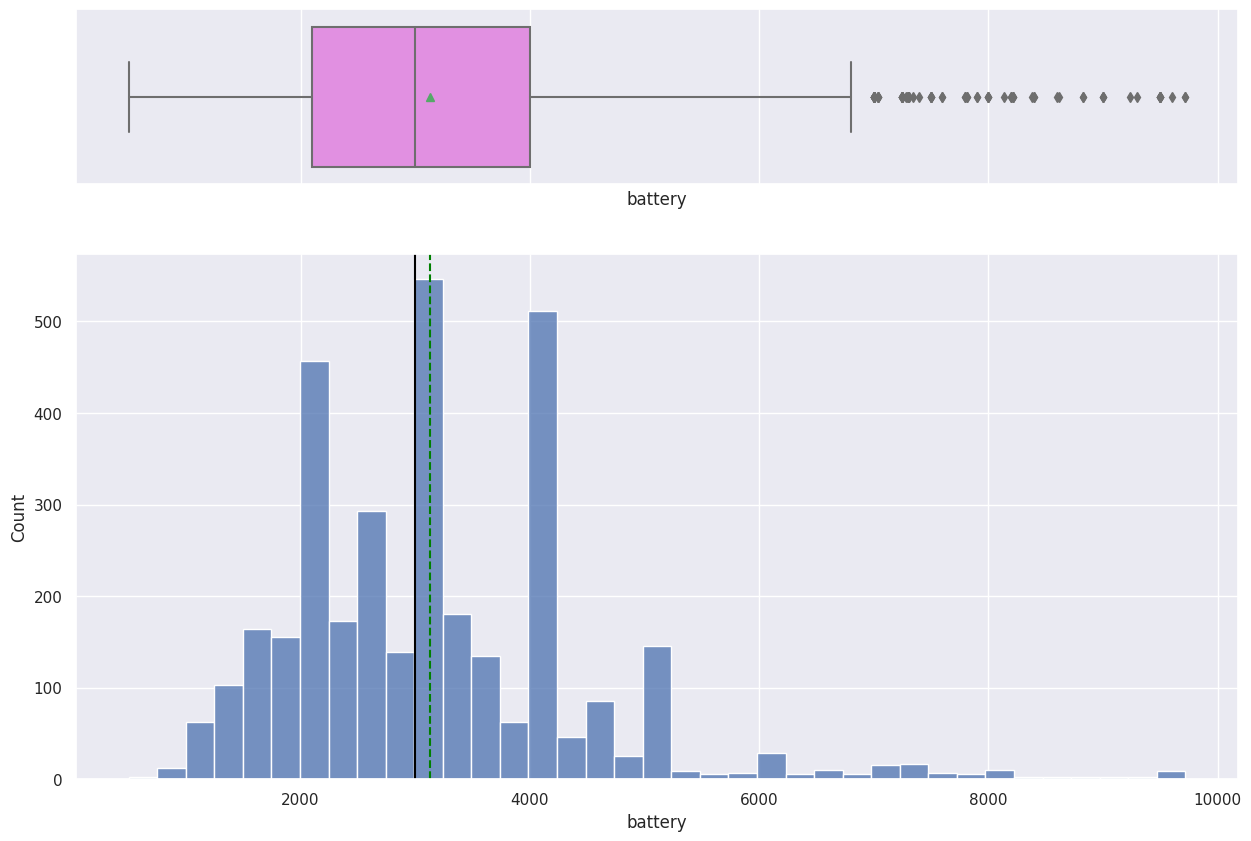

In [ ]:
histogram_boxplot(df, "battery")

* The battery is right-skewed again. Most of the phone/tablet have median battery size of 3000mAh or less.

**`Weight`**

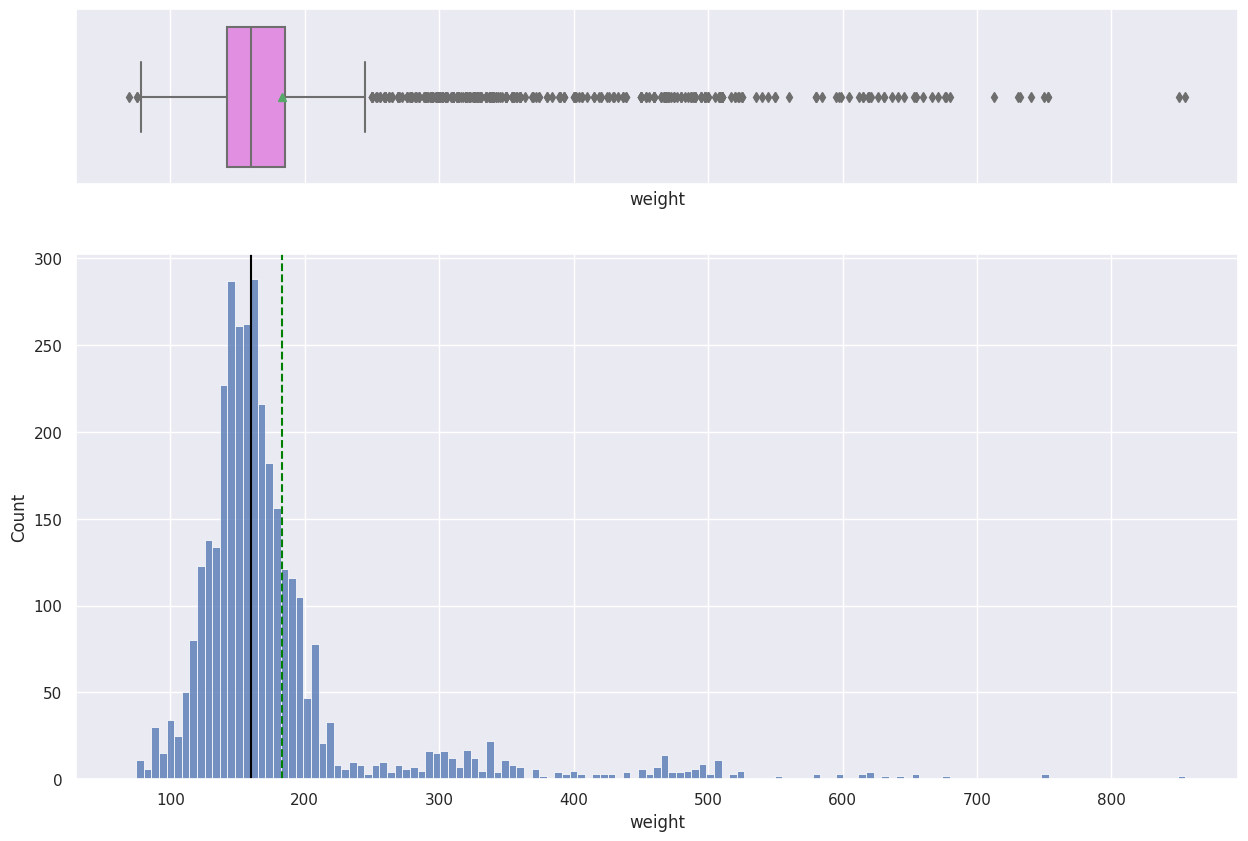

In [ ]:
histogram_boxplot(df, "weight")

* The weight of phone/tablet is heavily right-skewed. Most phone/tablet with a median weight of less than 200gms.

**`Days Used`**

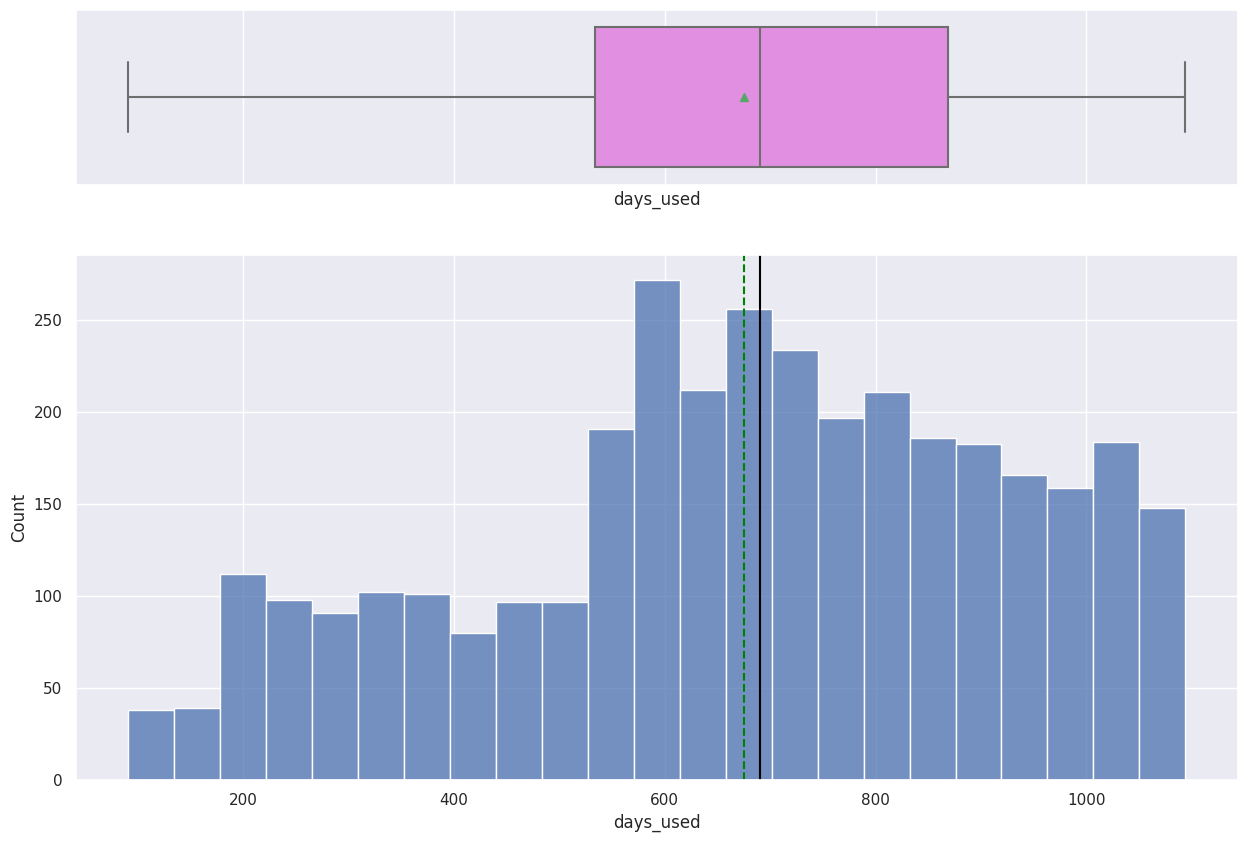

In [ ]:
histogram_boxplot(df, "days_used")

* The average number of days a phone/tablet is used before being sold is close to 700 days and we can see a left-skewness to the data.

**`Normalized Used Price`**

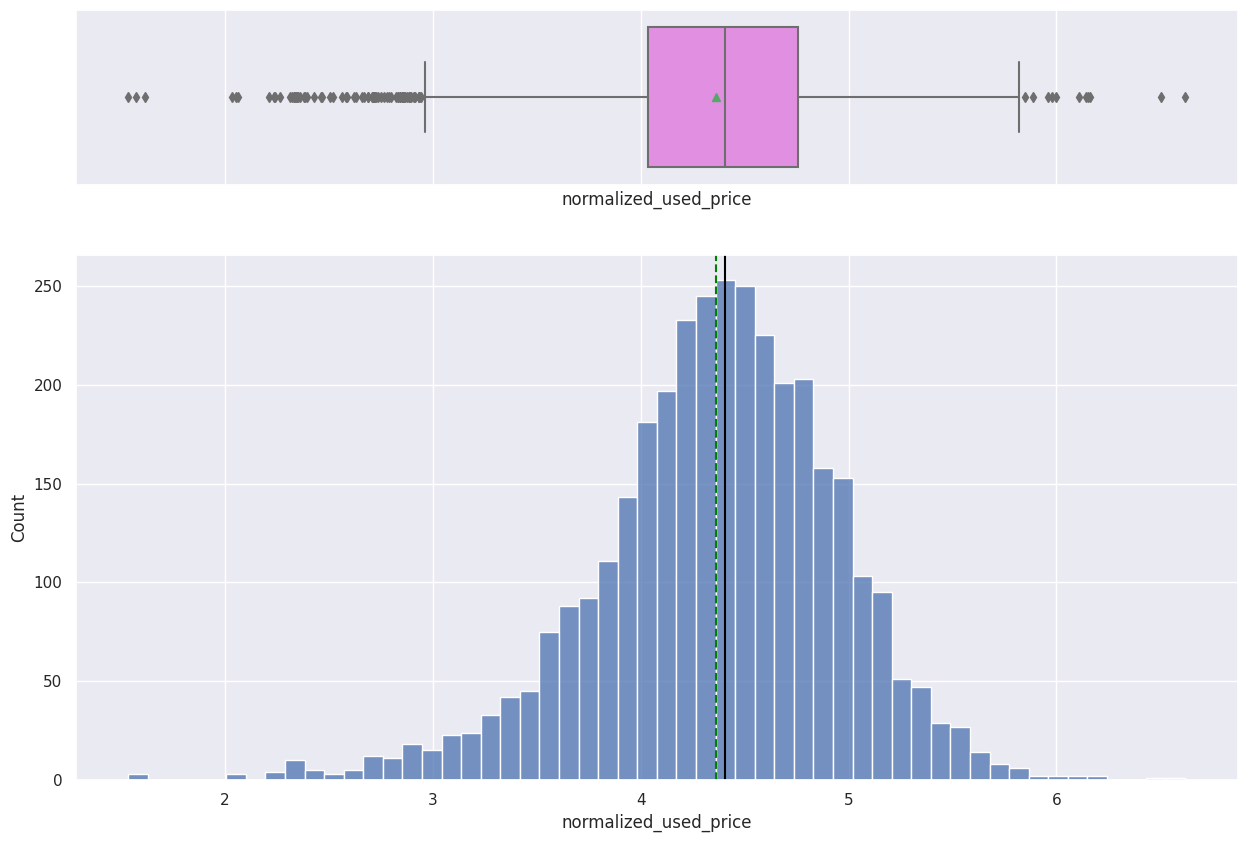

In [ ]:
histogram_boxplot(df, "normalized_used_price")

* We can see that the used phone/tablet price has a normal distribution with a slight left-skewness or slightly longer left tail.

**`Normalized New Price`**

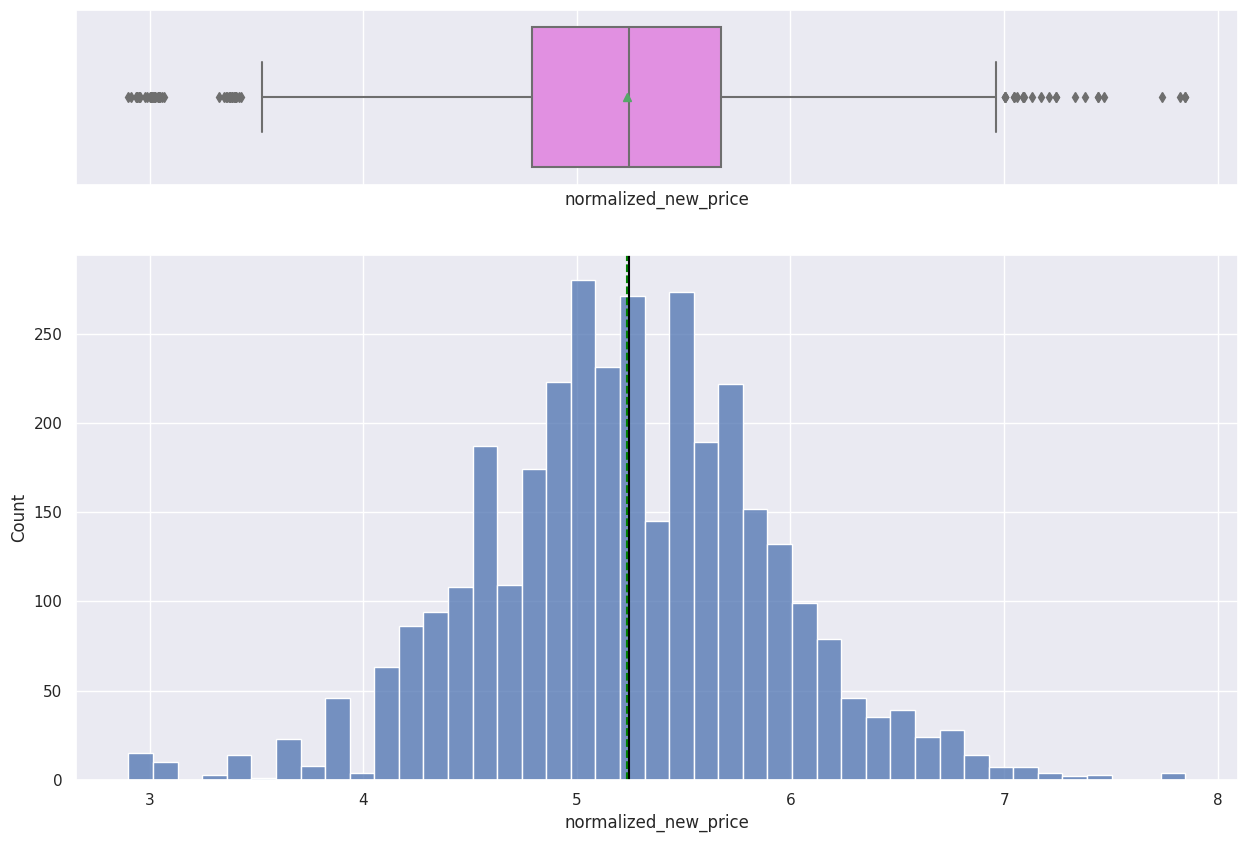

In [ ]:
histogram_boxplot(df, "normalized_new_price")

* We can see that the new phone/tablet price is normalized as well.

**`OS`**

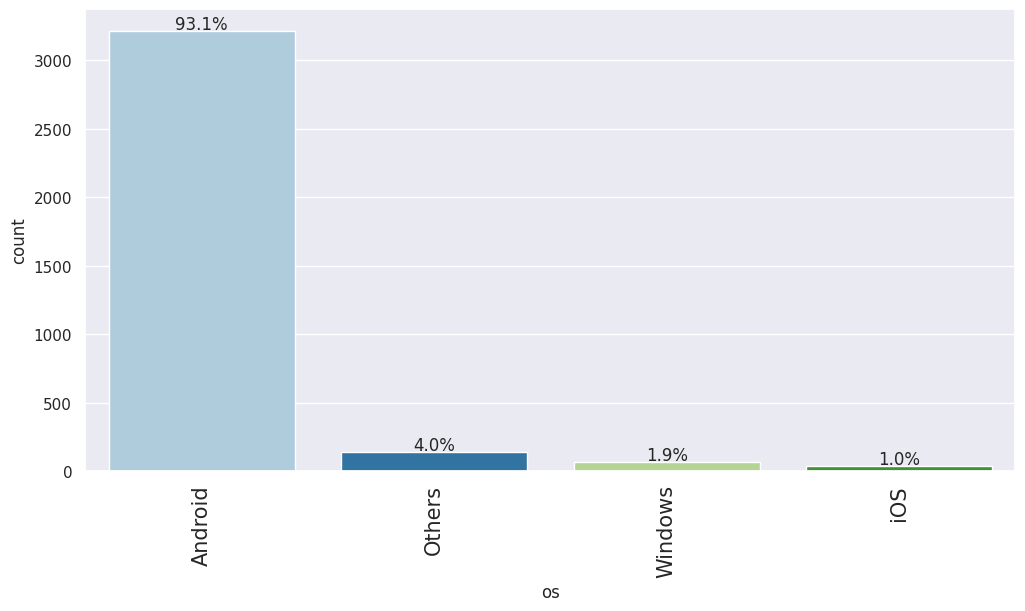

In [ ]:
labeled_barplot(df, "os", perc=True, n=10)

* As seen 93% of the used phone/tablet market is dominated by Android

**`4G`**

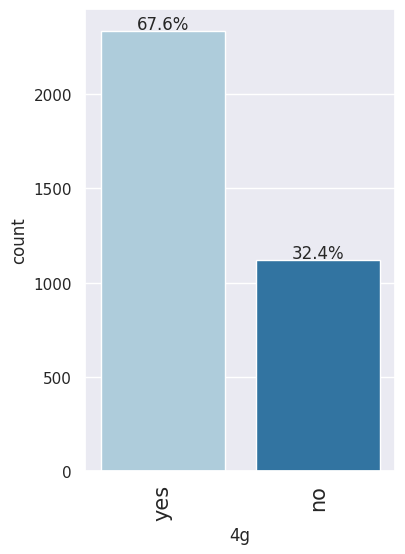

In [ ]:
labeled_barplot(df, "4g", perc=True)

* 67% of the phone/tablet have 4g capability.

**`5G`**

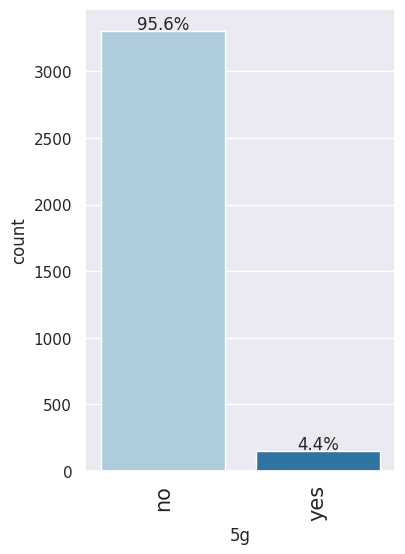

In [ ]:
labeled_barplot(df, "5g", perc=True)

* Less than 5% of the phone/tablet have 5g capability.

**`Release Year`**

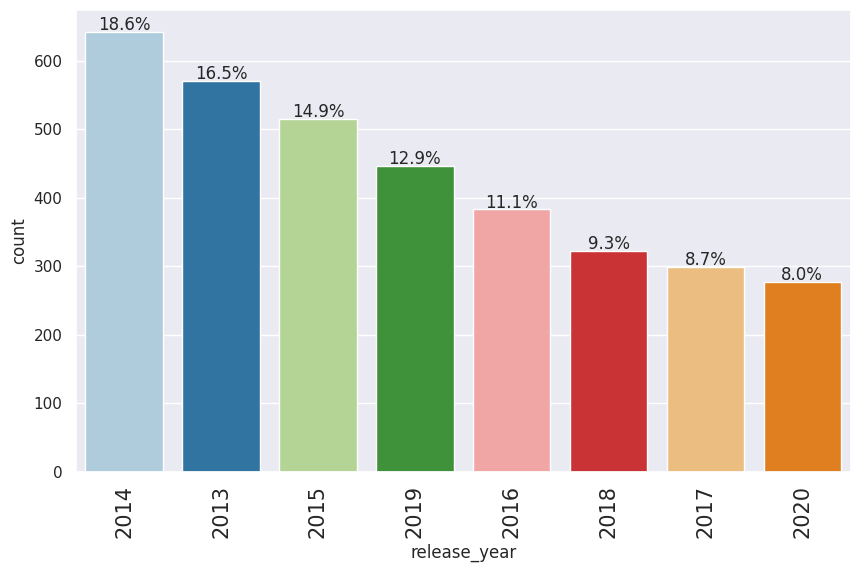

In [ ]:
labeled_barplot(df, "release_year", perc=True)

* 50% of the phone/tablet are before 2015.

**`Brand Name`**

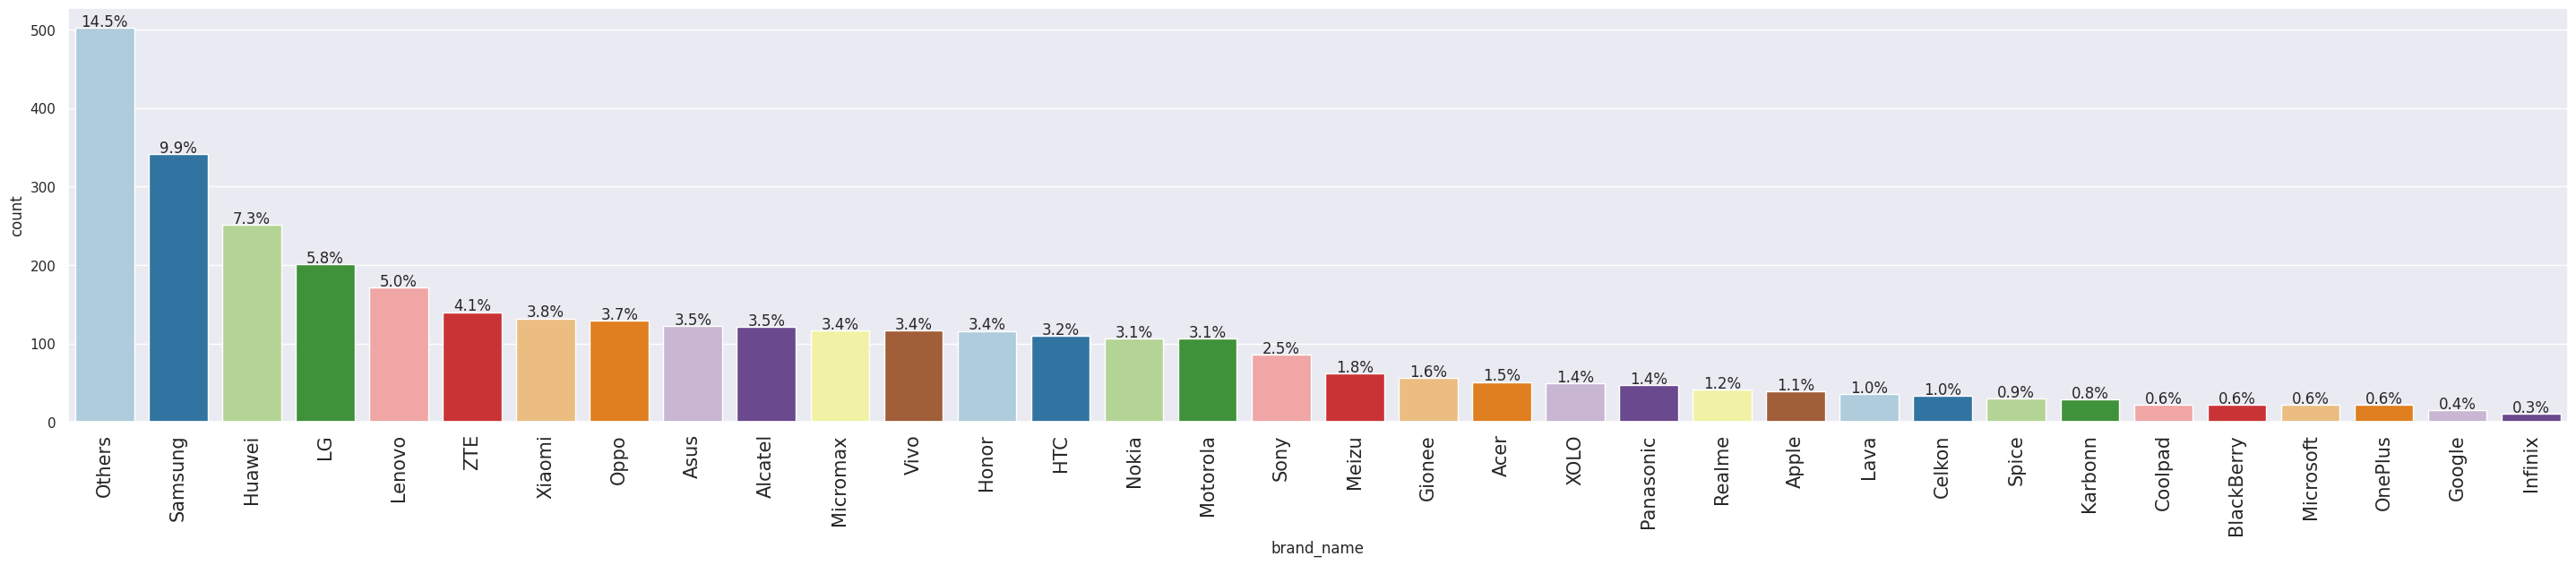

In [ ]:
labeled_barplot(df, "brand_name", perc=True)

* Top 5 brands for used/refurbished phone/tablet market are Samsung, Huawei, LG, Lenovo and ZTE

**`Phones/tablets with screen-size > 6"`**

Total number of cellphones and tablets available across different brands with a screen size larger than 6 inches: 1099


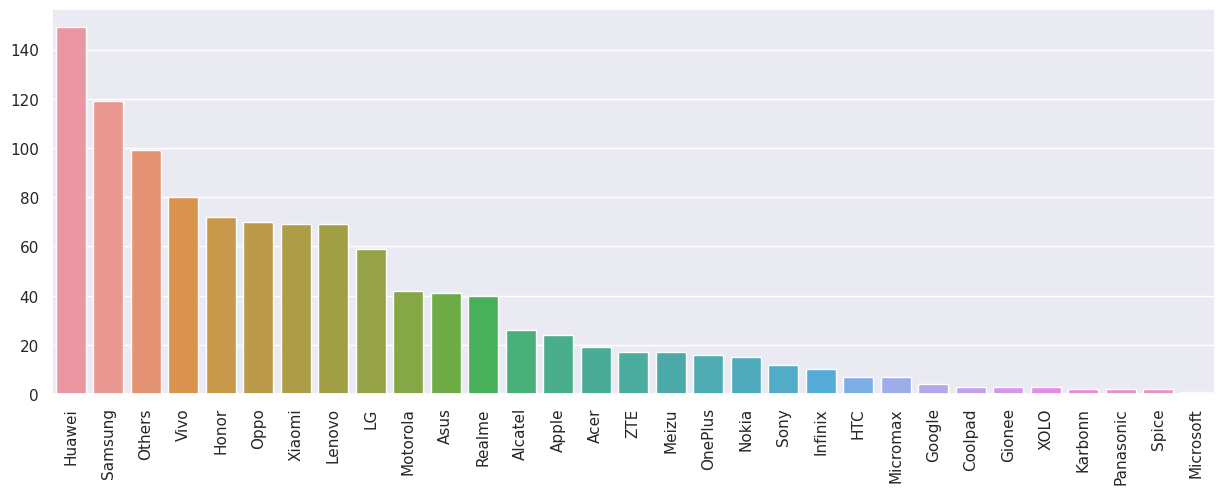

In [ ]:
# Cellphone brands with screen-size greater than 6" (inches)

df_large_screen = df[df.screen_size > 15.24]
s = df_large_screen['brand_name'].value_counts()
s1 = df_large_screen['brand_name'].count()
print(f"Total number of cellphones and tablets available across different brands with a screen size larger than 6 inches:",s1)
plt.figure(figsize=(15, 5))
sns.barplot(x=s.index, y=s.values, order=s.index)
plt.xticks(rotation=90)
plt.show();

* A Total of 1,099 phone/tablet and tablets have a screen size larger than 6 inches.
* Top 5 brands offering larger screens are Huawei, Samsung, Vivo, Honor & Oppo.

**`Phones/tablets with selfie camera > 8MP`**

Total number of cellphones and tablets available across different brands with a selfie camera greater than 8MP: 655


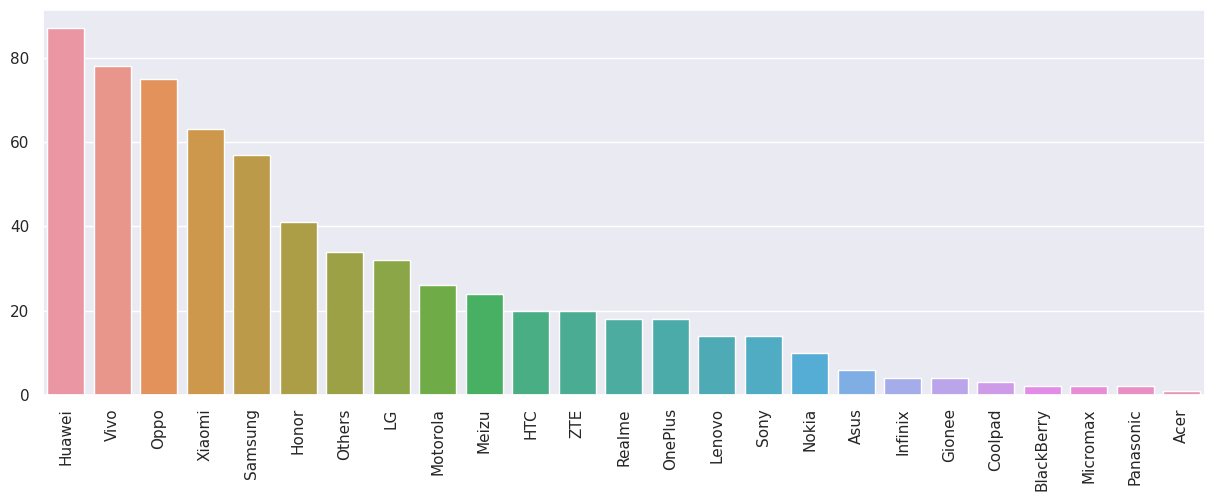

In [ ]:
# Distribution of cellphone devices with selfie camera greater than 8MP

df_selfie_camera = df[df.selfie_camera_mp > 8]
t = df_selfie_camera['brand_name'].value_counts()
t1 = df_selfie_camera['brand_name'].count()
print(f"Total number of cellphones and tablets available across different brands with a selfie camera greater than 8MP:",t1)
plt.figure(figsize=(15, 5))
sns.barplot(x=t.index, y=t.values, order=t.index)
plt.xticks(rotation=90)
plt.show();

* A Total of 655 phone/tablet and tablets have a selfie camera greater than 8MP.
* Top 5 brands offering higher selfie cameras resolution are Huawei, Vivo, Oppo, Xiaomi & Samsung.

### Bivariate Analysis

**`Correlation`**

In [ ]:
# Excluding release_year from the dataset to plot heatmap
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("release_year")
cols_list

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

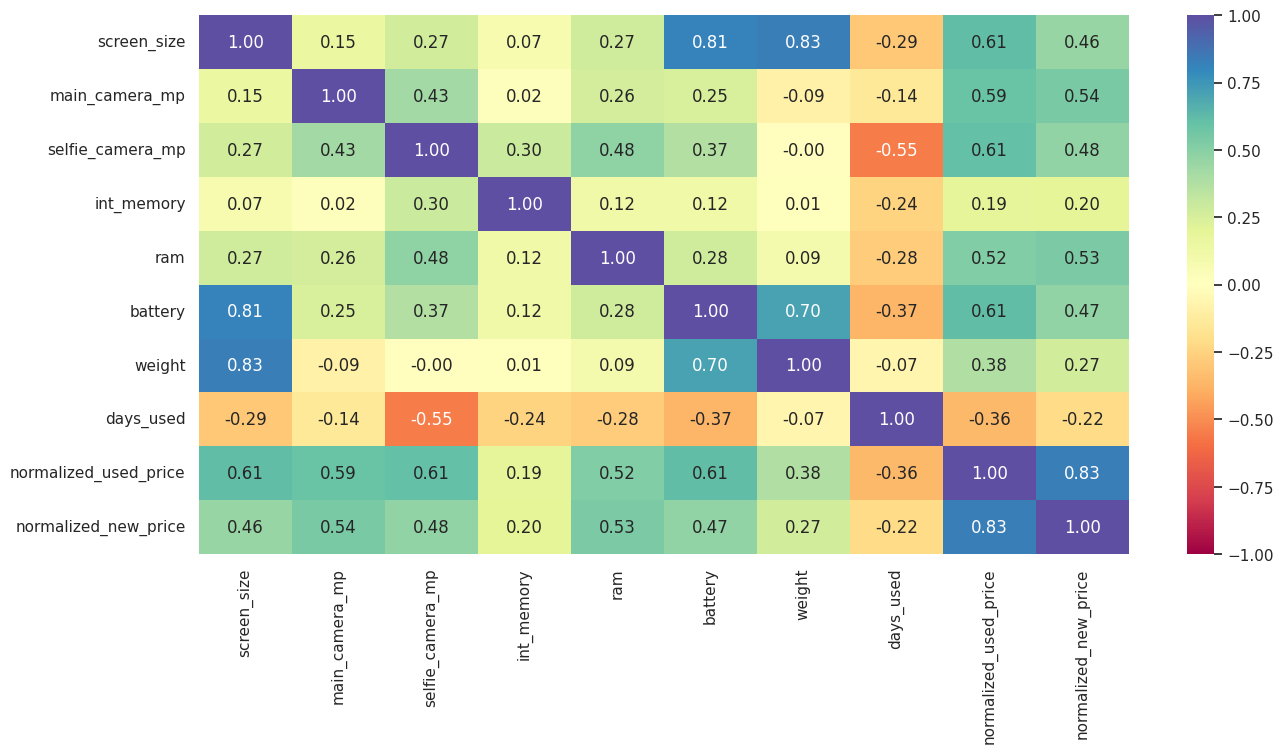

In [ ]:
# Checking the correlation between variables
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The weight of a phone/tablet is highly correlated with the screen size of the phone.
* Similarly, battery size is also highly correlated with screen size of the phone/tablet
* The release year of the phone/tablet is inversely correlated to the days used.
* Screen size, selfie camera, battery and normalized new price are all highly correlated to the normalized used price of the phone/tablet.

**`RAM size by brand name`**

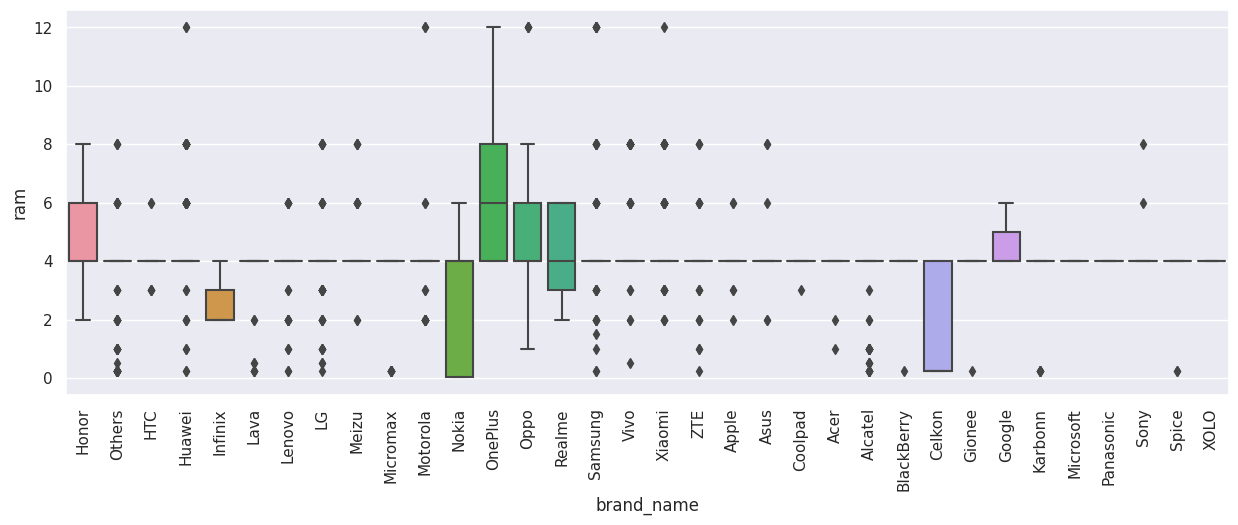

In [ ]:
# Checking the variation in the RAM size available by brands
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

* As amount of RAM is important for the smooth functioning of a device we see that most of the used phone/tablet have an average RAM size if 4GB.
* Brands like OnePlus, Oppo, Realme have RAM greater than average.
* Brands like Nokia, Infinix, Celkon having RAM smaller than average.

**`Battery size by brand name`**

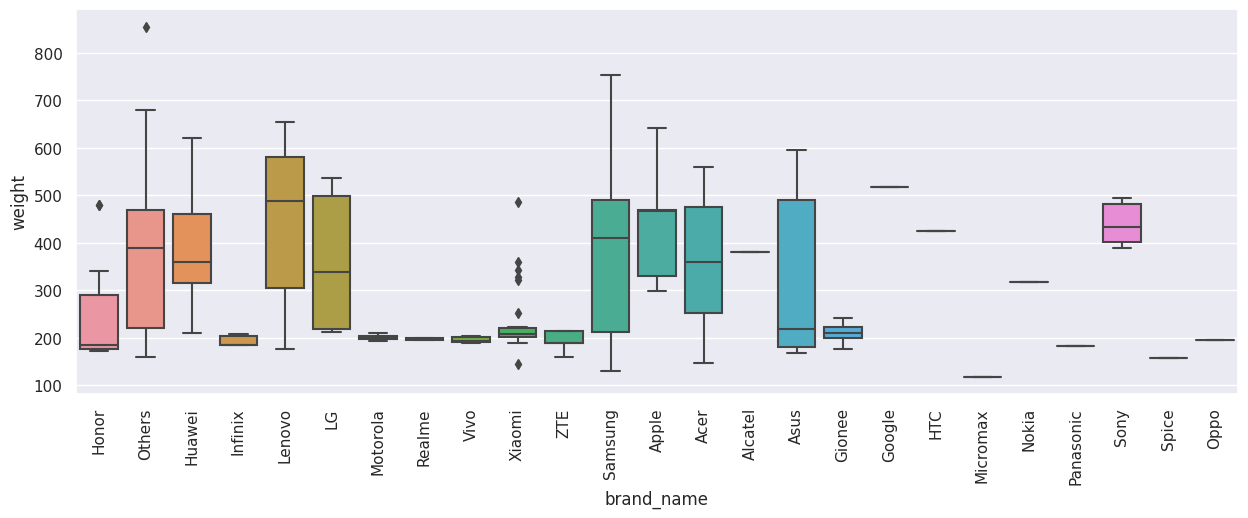

In [ ]:
# Checking the distribution of cellphones with battery size greater than 4500 mAh
df_large_battery = df[df.battery > 4500]
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

* Larger batteries are preffered nowadays for people who travel a lot, blog a lot or create content a lot.
* Most brands now a days offer phone/tablet with larger batterie which tends to increase the overall weight of the phone/tablet.
* As seen from above brands like Lenovo, Apple, Samsung, Google, HTC and Sony have median weight greater than 400 grams.
* Brands like Huawei, LG, Acer, Nokia, Others have a median average weight between 300-400 grams.
* Brands like Honor, Infinix, Motorola, Realme, Vivo, Xiaomi, ZTE, Spice, Oppo and Gionee have average median weight less than 250 grams and still can hold a battery capacity of greater than 4500 mAh.

**`Normalized used price by release year`**

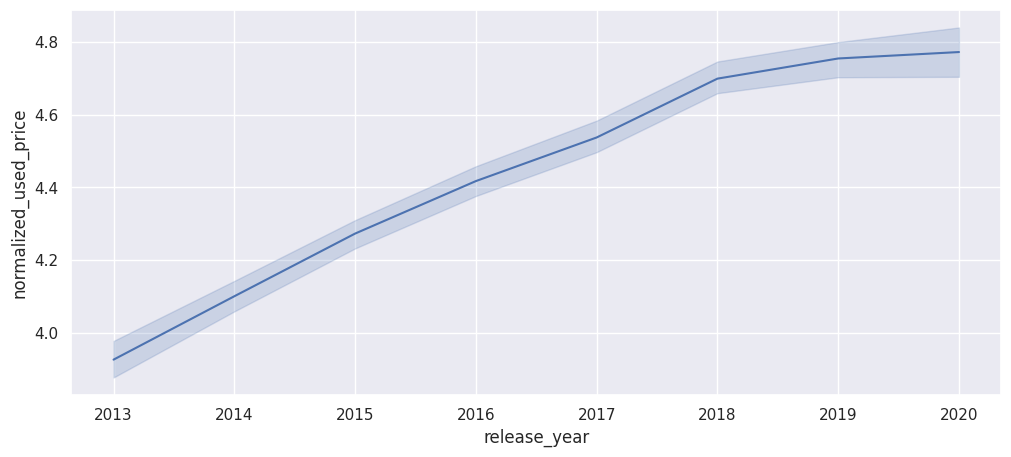

In [ ]:
# Checking the price trend for used cellphones by release year of those cellphones
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="release_year", y="normalized_used_price")
plt.show()

* Newer the phone/tablet higher the price of the used phone/tablet and vice-versa.

**`Normalized used price by Network offering`**

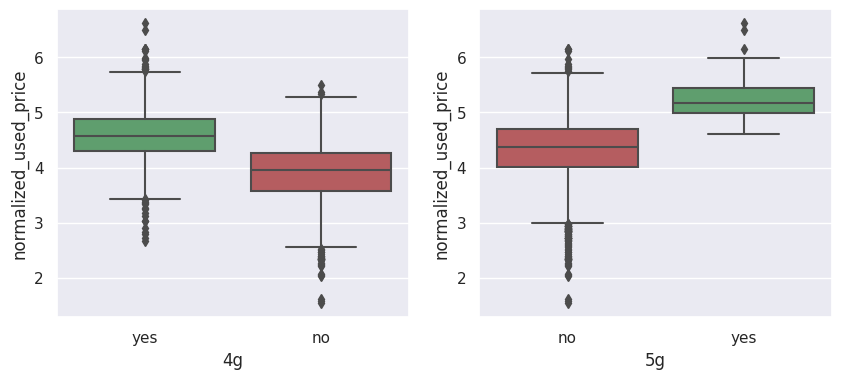

In [ ]:
# Checking the price range of used cellphones with respect to 4G and 5G network offerings
plt.figure(figsize=(10, 4))

my_pal = {"yes": "g", "no": "r"}

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price", palette=my_pal)

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price", palette=my_pal)

plt.show()

* Average price of a used phone/tablet offering 5G network is higher than the price of phone/tablet offering 4G network.

## Data Preprocessing

### Missing Value Treatment
- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# checking for missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Let's fix the missing values in the data.

For all the variables missing data, we will impute the missing values with the median grouped by brand name and release year.

In [ ]:
# we first create a copy of the data to avoid changes to it
df1 = df.copy()

In [ ]:
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Imputing missing values in all columns with median by grouping the data by brand name and release year
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name','release_year'])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Imputing remaining missing values in all columns with median by grouping the data by brand name
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
# Since we still have missing values in column main_camera_mp we will impute the values by taking column median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

## EDA

- It is a good idea to explore the data once again after manipulating it.

**`Main Camera(MP)`**

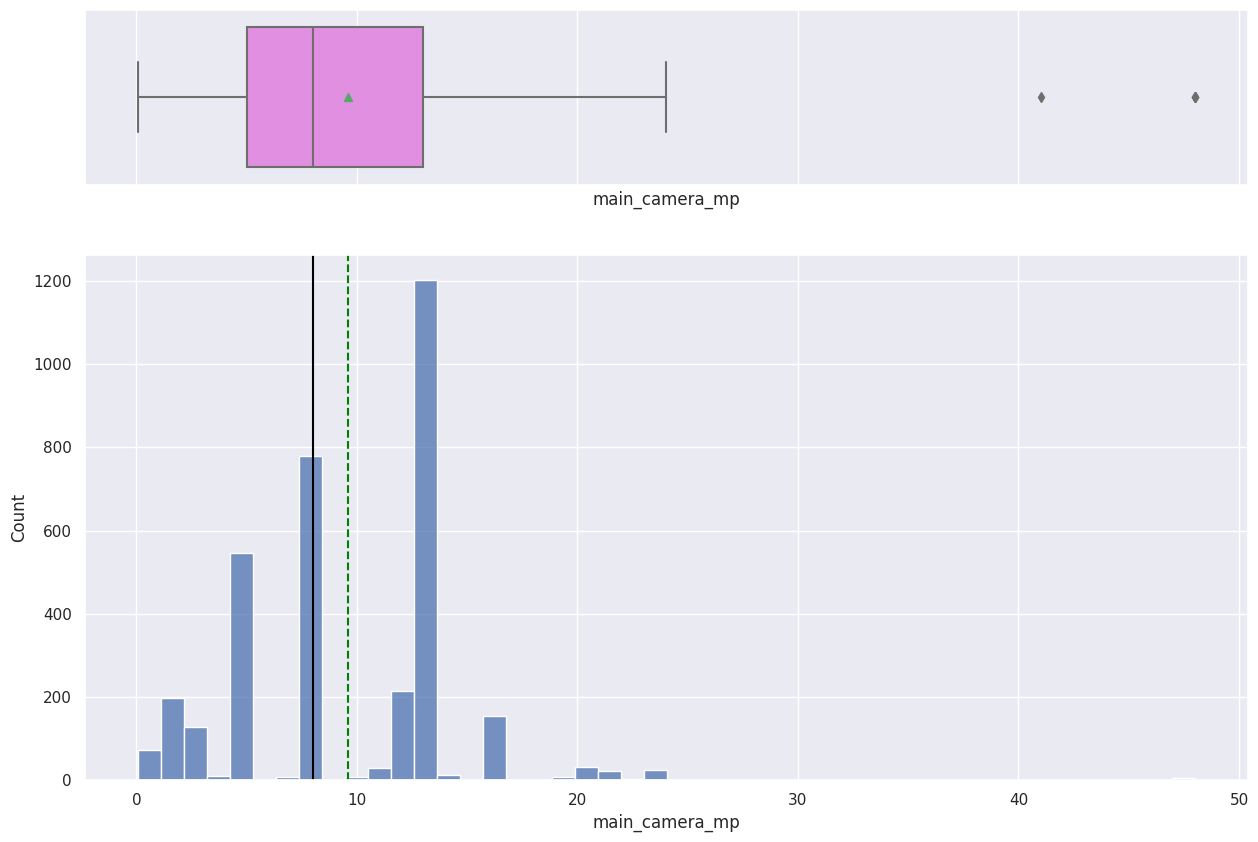

In [ ]:
histogram_boxplot(df1, "main_camera_mp")

* The main camera megapixel are right-skewed. Phone/tablet have either 5MP, 8MP or 13MP resolution for the main camera with a median resolution of less than 10MP.

**`Selfie Camera(MP)`**

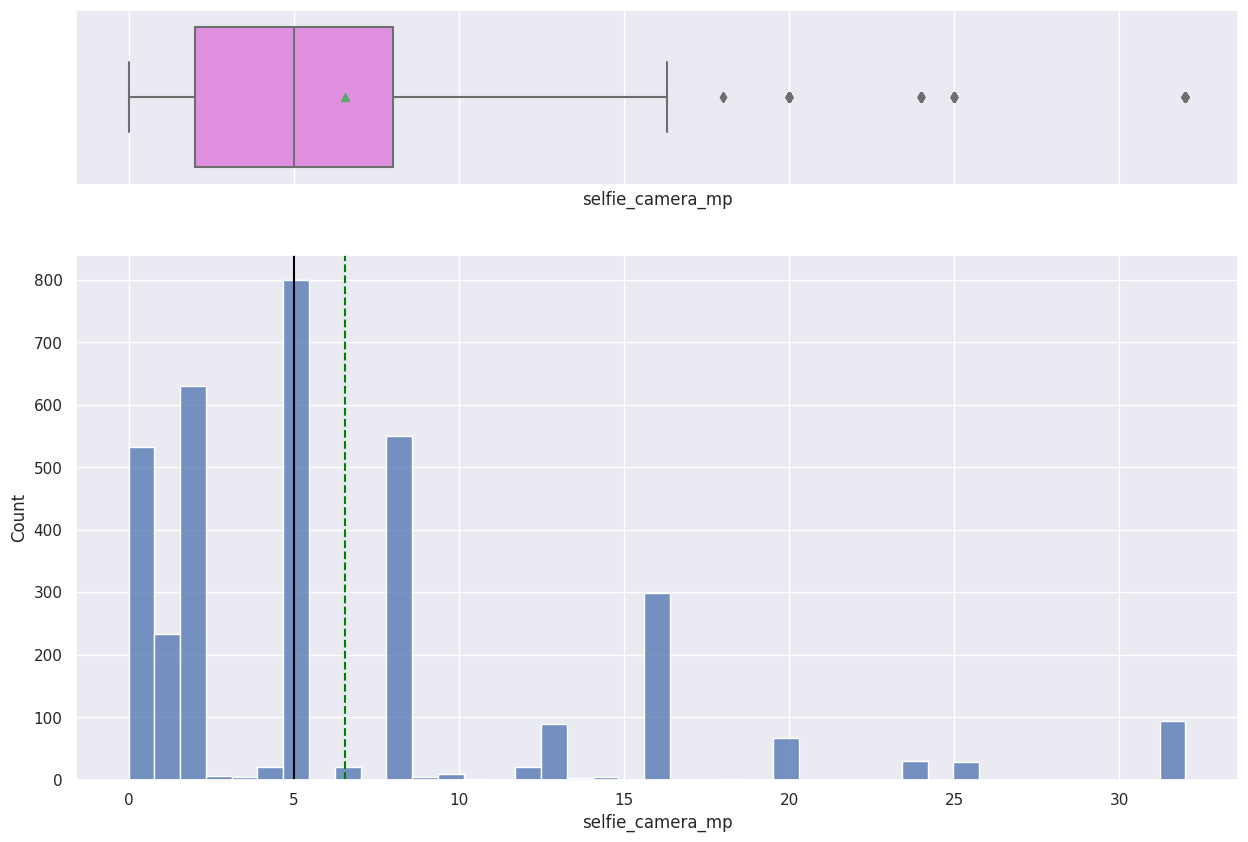

In [ ]:
histogram_boxplot(df1, "selfie_camera_mp")

* The selfie camera megapixel are right-skewed. Phone/tablet have a very small resolution for their selfie camera with a median resolution of less than 5MP.

**`Internal Memory`**

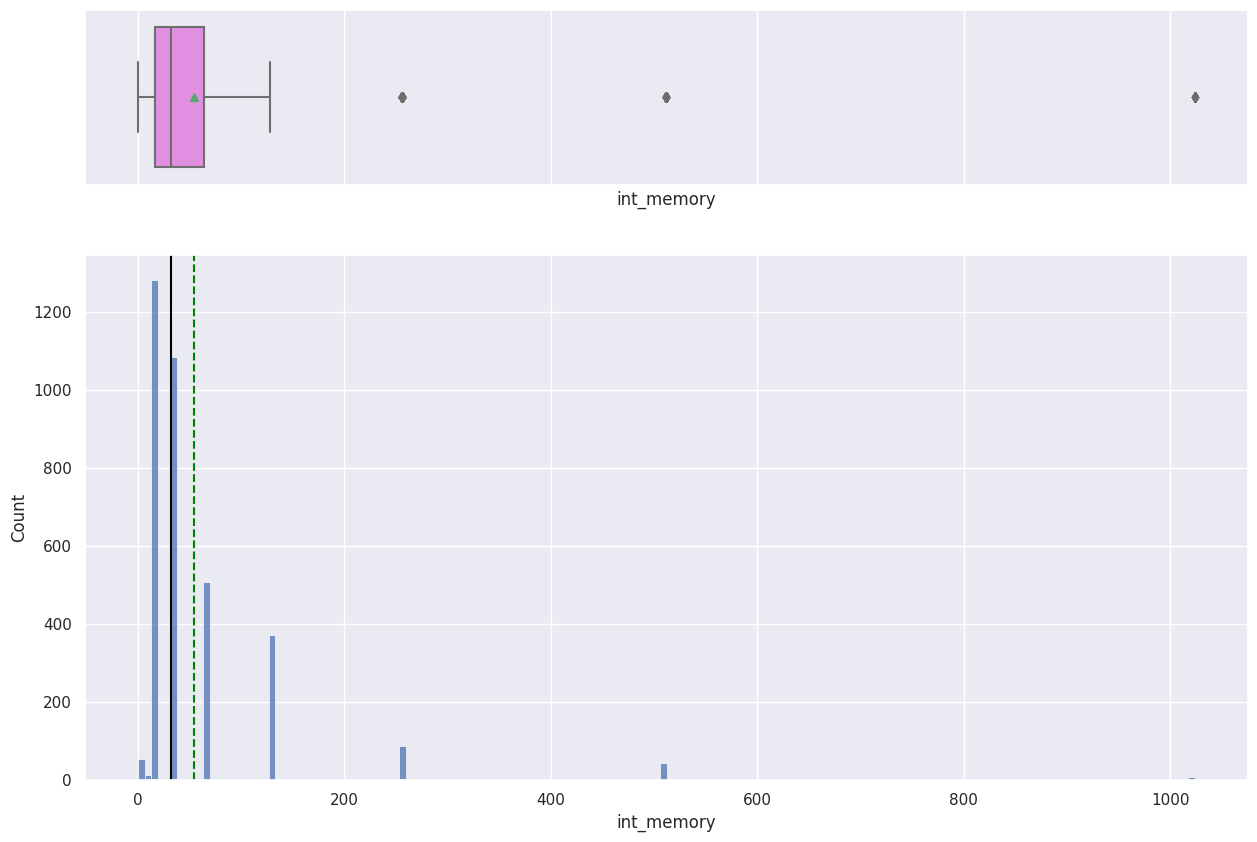

In [ ]:
histogram_boxplot(df1, "int_memory")

* The internal storage memory attribute is right-skewed. Majority of the phone/tablet have a very small storage memory with a median storage size of less than 50GB.

**`RAM`**

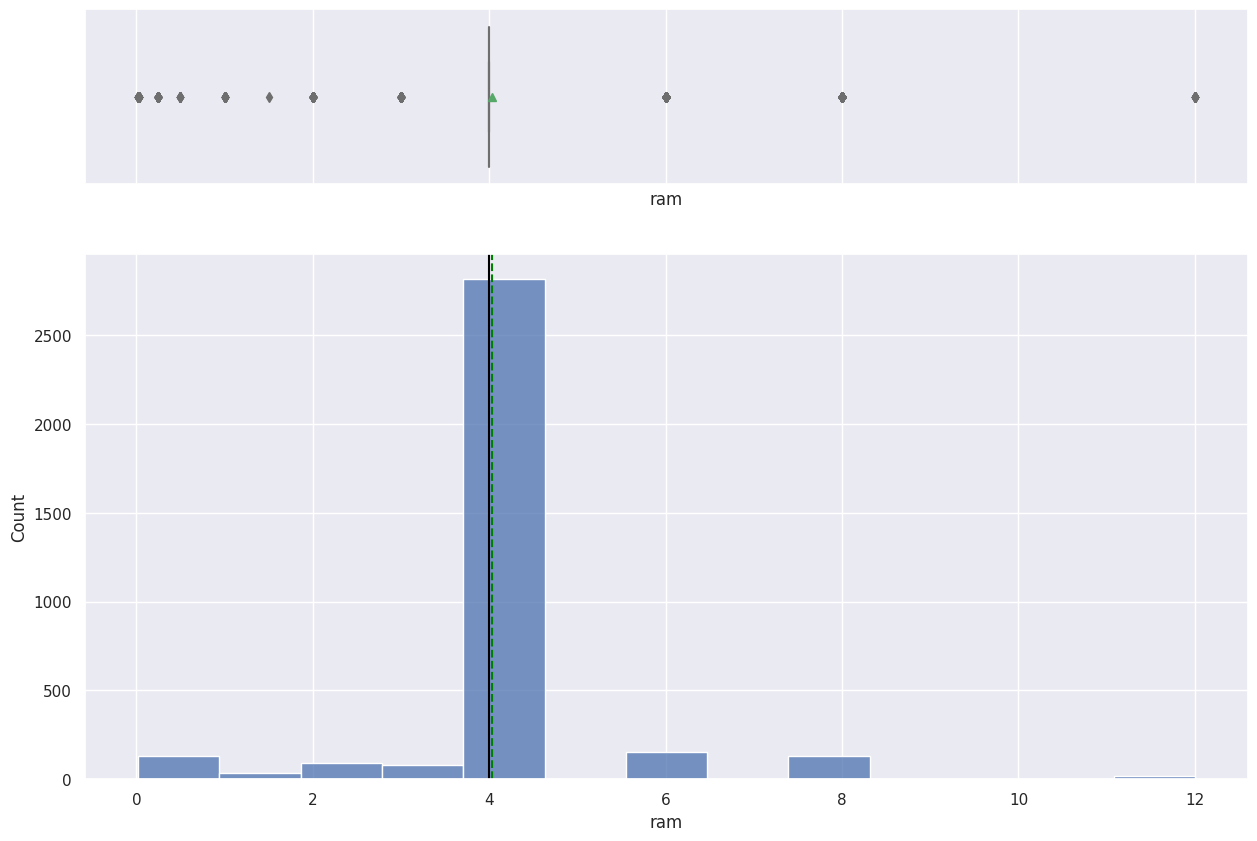

In [ ]:
histogram_boxplot(df1, "ram")

* The RAM memory attribute looks normally distribute as mean, median and mode are equal. Almost all phone/tablet except few have 4GB of RAM size.

**`Battery`**

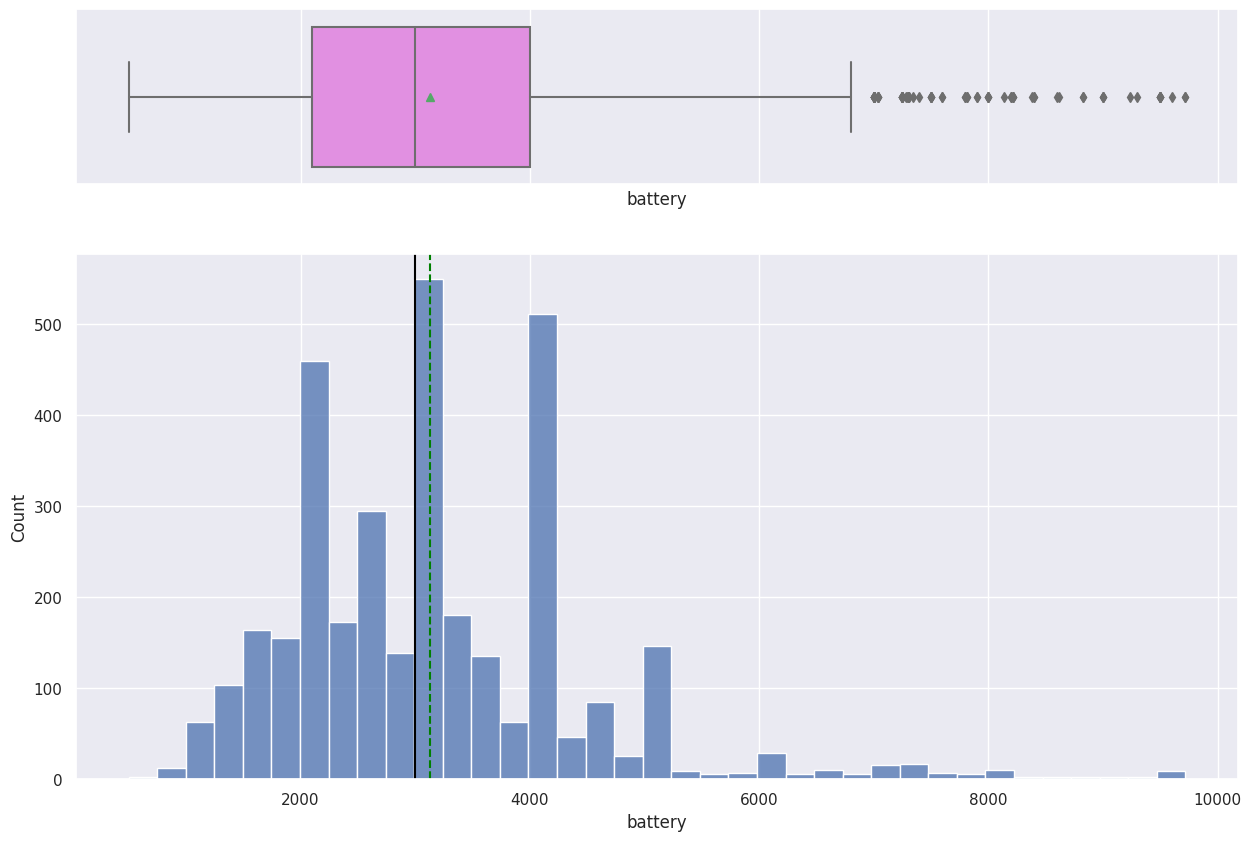

In [ ]:
histogram_boxplot(df1, "battery")

* The battery is right-skewed again. Most of the phone/tablet have a median battery size of 3000mAh or less.

**`Weight`**

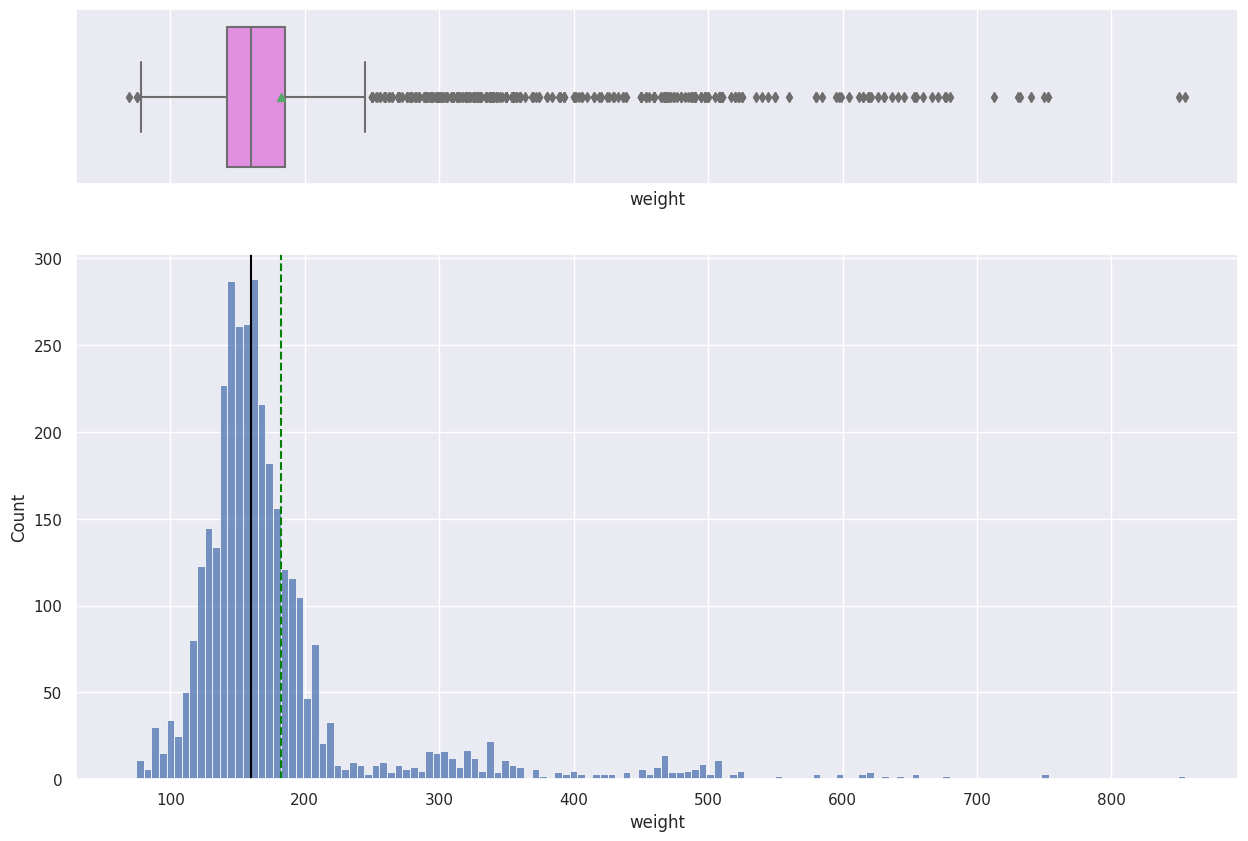

In [ ]:
histogram_boxplot(df1, "weight")

* The weight of phone/tablet is heavily right-skewed. Most phone/tablet median weight is less than 200gms.

### Feature Engineering

* Let's create a new feature `years_since_release` by taking the difference between current year '2021' and `release_year` column
* We will drop the original column `release_year` once the new feature is created as the year values themselves are not numerical in nature

In [ ]:
# Create a new column 'years_since_release' and delete the original column 'release_year'
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


### Outlier Detection

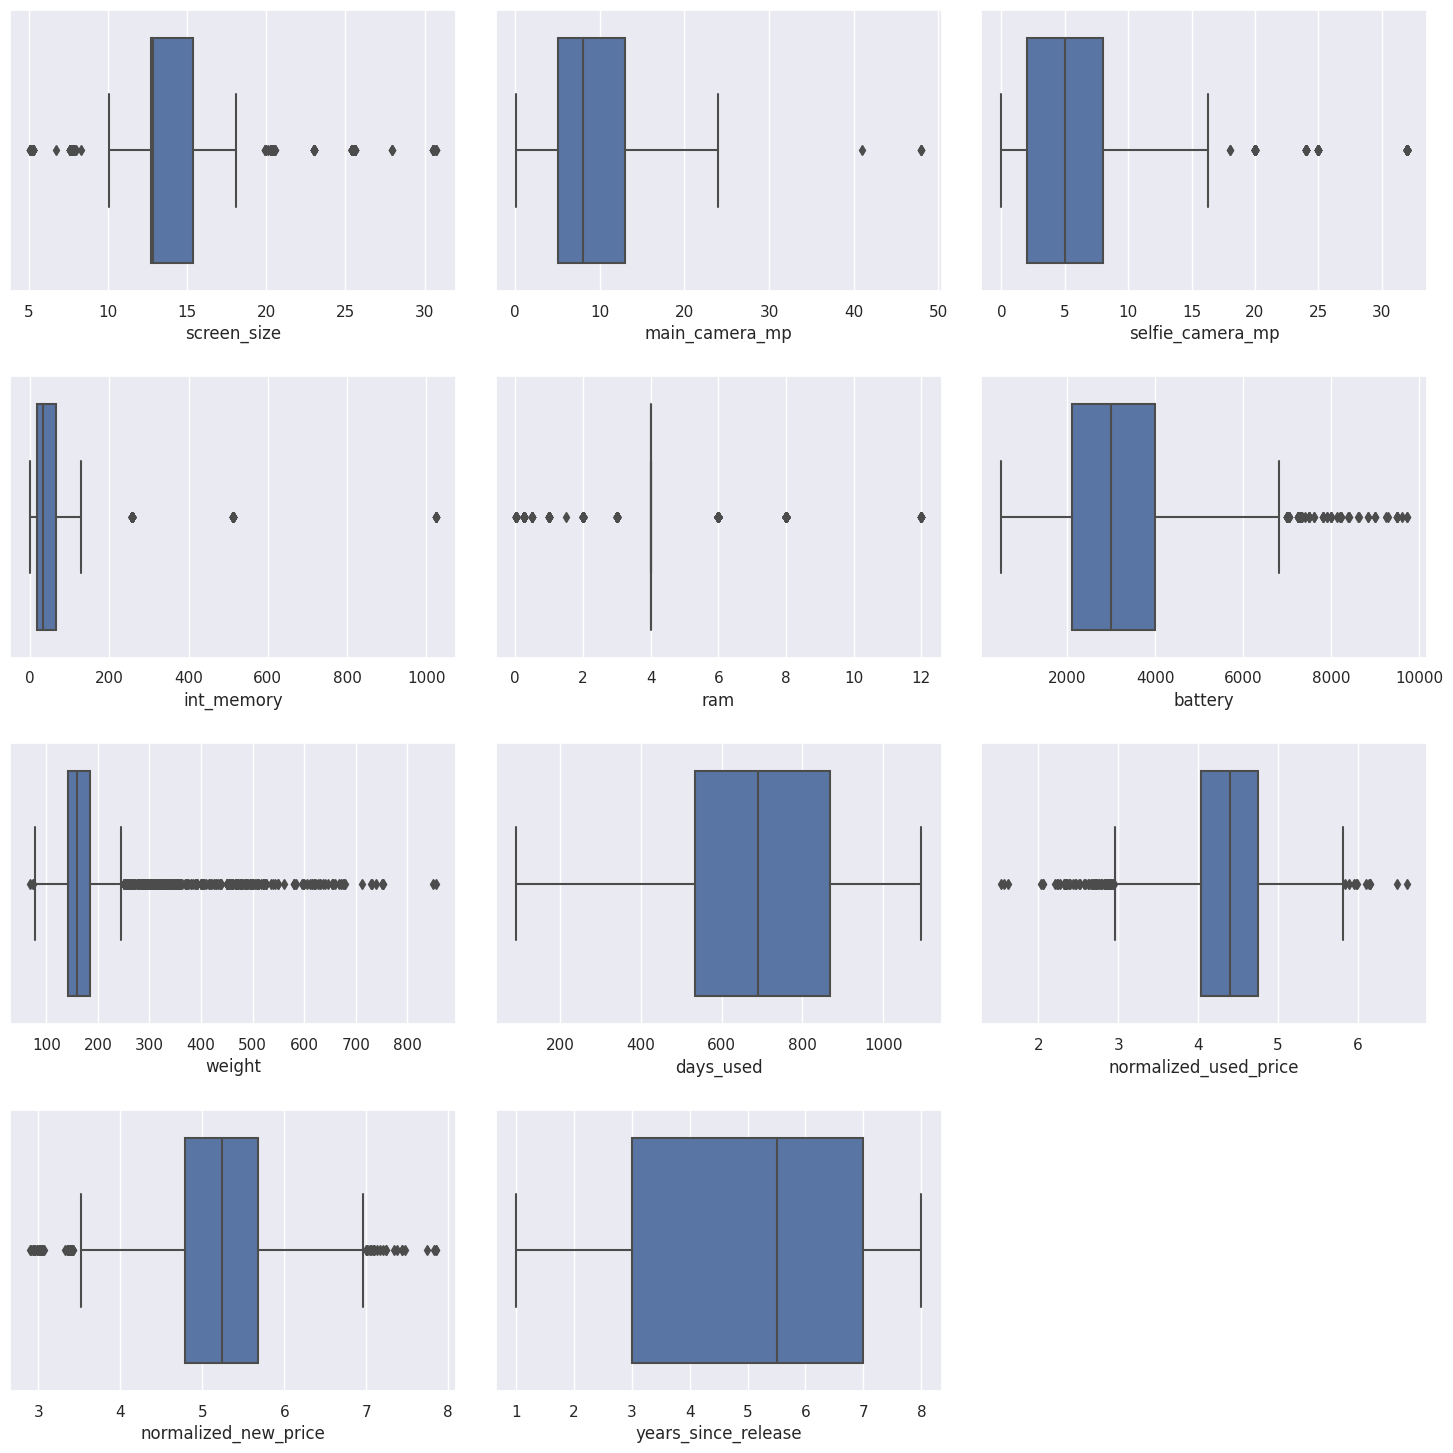

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are quite a few outliers in the data
- However, we will not treat them as they are proper values

### Data Preparation for Modeling

- We want to predict the normalized pricing for used and refurbished devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                           04:24:49   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.842**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3156**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `screen_size` is **0.0244**.

## Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict normalized price within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized princing

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied. We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY


- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

In [ ]:
### Removing Multicollinearity


To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["brand_name_Apple", "os_iOS"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841809,0.232201
1,os_iOS,0.841795,0.232211


In [ ]:
col_to_drop = "brand_name_Apple"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,227.303871
1,screen_size,7.643583
2,main_camera_mp,2.284429
3,selfie_camera_mp,2.791121
4,int_memory,1.364138
5,ram,2.273686
6,battery,4.079720
7,weight,6.394014
8,days_used,2.659799
9,normalized_new_price,3.102417


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     274.5
Date:                   Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                           04:24:52   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -151.7
Df Residuals:                       2369   BIC:                             126.2
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

- We can see that adj. R-squared hasn't dropped, it is still at 0.845 which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     988.1
Date:                   Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                           04:24:53   Log-Likelihood:                 104.71
No. Observations:                   2417   AIC:                            -181.4
Df Residuals:                       2403   BIC:                            -100.4
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231712,0.181763,0.842409,0.841491,4.359962


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236807,0.18348,0.844523,0.842393,4.467055


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.842, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was also 0.842
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### TEST FOR LINEARITY AND INDEPENDENCE

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855243,0.232245
1525,4.448399,4.628813,-0.180413
1128,4.315353,4.280778,0.034574
3003,4.282068,4.206270,0.075798
2907,4.456438,4.470315,-0.013877


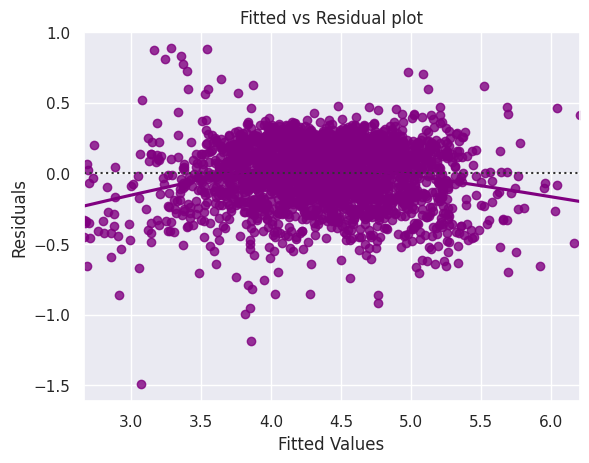

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

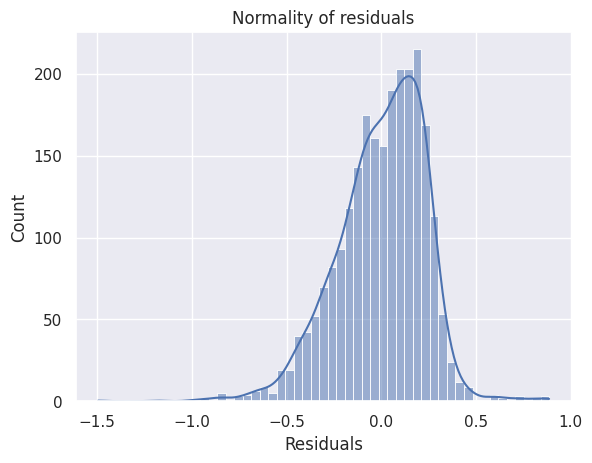

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

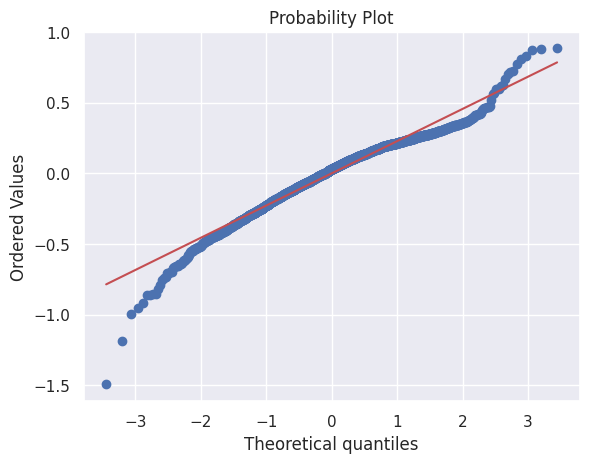

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9690964221954346, pvalue=2.131064442768085e-22)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0438035947010258), ('p-value', 0.22944475832466488)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.373741
2341,3.696103,3.962922
1913,3.592093,3.690961
688,4.306495,4.116687
650,4.522115,5.137917
2291,4.259294,4.395249
40,4.997685,5.434104
1884,3.875359,4.054845
2538,4.206631,4.047439
45,5.380450,5.276715


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     988.1
Date:                   Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                           04:24:56   Log-Likelihood:                 104.71
No. Observations:                   2417   AIC:                            -181.4
Df Residuals:                       2403   BIC:                            -100.4
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231712,0.181763,0.842409,0.841491,4.359962


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236807,0.18348,0.844523,0.842393,4.467055


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.46% of the normalized price

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

#### **Insights:**

We analyzed a dataset of nearly 3454 used and refurbished phone/tablet for a startup ReCell. The data contains different attributes related to a phone/tablet like, brand, os, screen size, 4G, 5G, main camera, selfie camera etc.. After developing a ML-based solution, the main features infuencing the price of a used or refurbished phone/tablet are Normalized New Price, Xiaomi phones followed by Nokia and Lenovo brands, Screen Size and Main Camera. On the other hand features that could impact the price of used and refurbished cellphone or tablet is if the phone/tablet or tablet has a different OS than Apple or Android and older generation phone/tablet.

#### **Conclusions:**

1. The model is able to explain ~84% of the variation in the data and within 4.46% of the normalized used price on the test data, which is excellent.
    - This indicates that the model is good for prediction as well as inference purposes.

2. If the screen size of the phone/tablet increases by one unit, then its normalized used price increases by 0.256 units, all other variables held constant

3. Main camera, selfie camera, RAM and 4G have a positive correlation(influence) on the normalized used price. A unit increase in any one of the above increases the normalized used price of the phone/tablet by its coefficients respectively, all other variables held constant.

4. Years since Release, and Other OS have a negative correlation(influence) on the normalized used price. A unit increase in any one of the above decreases the normalized used price of the phone/tablet by its coefficients respectively, all other variables held constant.
    - Operating System other than Apple or Android and a very old phone/tablet decreases the normalized used price of the phone/tablet.

5. If the normalized new price of the phone/tablet increases by one unit, then its normalized used price increases by 0.4222 units, all other variables held constant. This is by far the most significant predictor variable.

6. Xiaomi, Nokia and Lenovo brand phone/tablet and tables have positive correlation (influence) on the the normalized used price. A unit increase in any one of the above increases the normalized used price of the phone/tablet by its coefficients respectively, all other variables held constant.

#### **Recommendations:**

1. Price latest generation phone/tablet higher than the older generation phone/tablet.

2. Carry more inventory of Xiaomi, Nokia and Lenovo phone/tablet and price them keeping in mind the target customers.

3. Price phone/tablet with bigger screen size and/or larger main camera and selfie camera differently than ones that don't posses the attributes.




___